In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mjais\Downloads\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_data = data.rename({'R&D Spend':'research','Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis=1)
startup_data.head()

,research,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
startup_data.isna().sum()

research     0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [8]:
startup_data[startup_data.values==0.00]

,research,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
startup_data[startup_data.duplicated()].shape

(0, 5)

In [10]:
continuous_feature = [feature for feature in startup_data.columns if startup_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


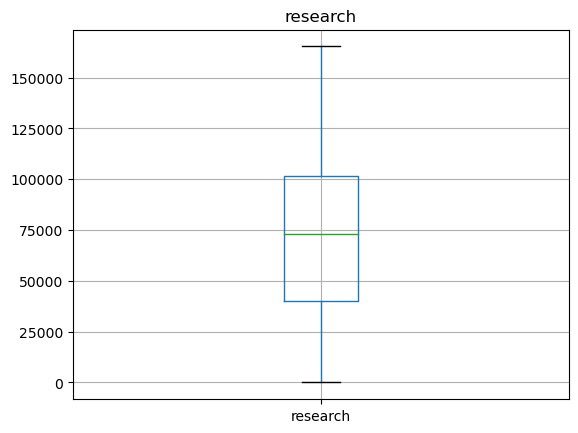

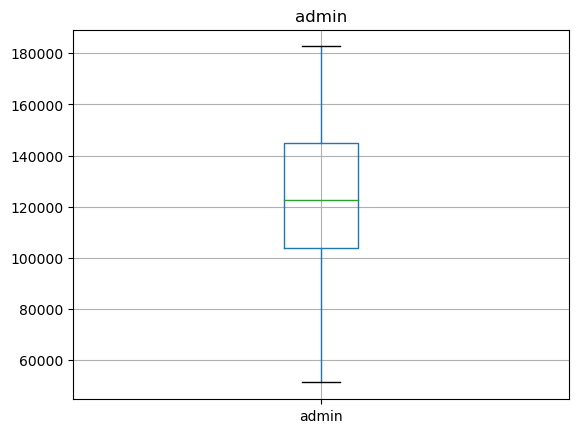

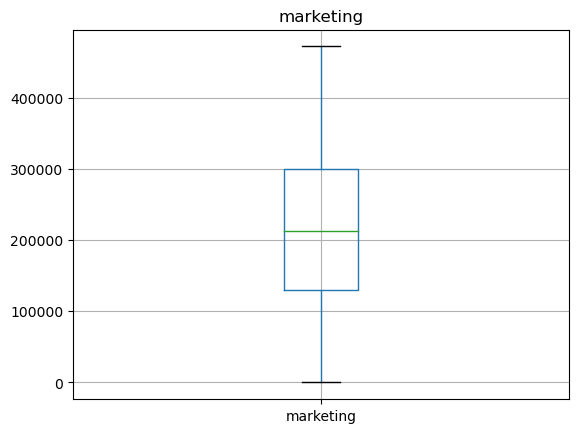

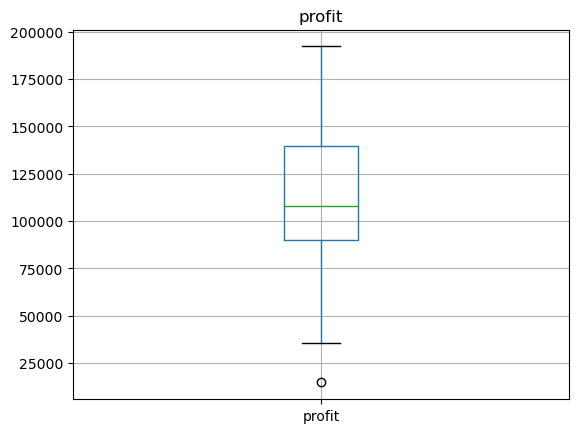

In [11]:
for feature in continuous_feature: 
    startup_data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [12]:
Q1 = np.quantile(startup_data.profit,0.25)
Q3 = np.quantile(startup_data.profit,0.75)
med = np.median(startup_data.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile       :', Q1,'\n' 
      'Second Quantile      :', med,'\n'
      'Third Quantile       :', Q3,'\n'
      'Inter-Quartile Range :', IQR,'\n' 
      'Upper Whisker        :', upper_bound,'\n' 
      'Lower Whisker        :', lower_bound)

First Quantile       : 90138.9025 
Second Quantile      : 107978.19 
Third Quantile       : 139765.97749999998 
Inter-Quartile Range : 49627.07499999998 
Upper Whisker        : 214206.58999999997 
Lower Whisker        : 15698.290000000023


In [13]:
Outliers = startup_data.profit[(startup_data.profit <= lower_bound) | (startup_data.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [14]:
display(startup_data[startup_data.index.isin([49])])

,research,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


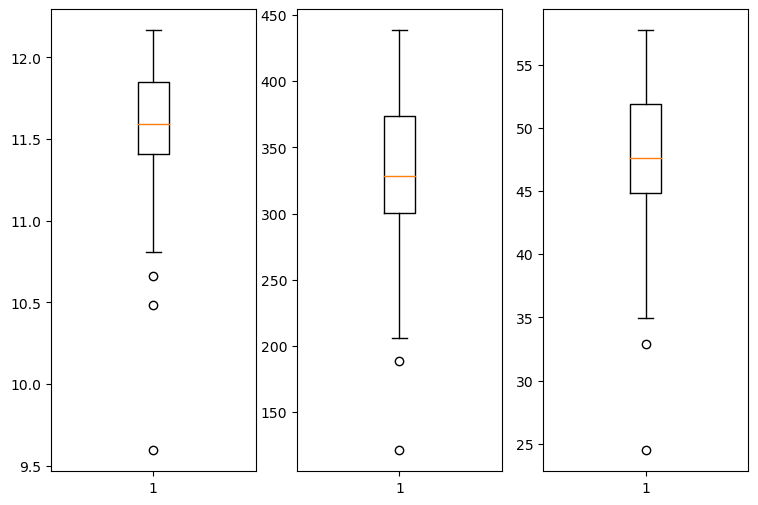

In [15]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(startup_data['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(startup_data['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(startup_data['profit']))
plt.show()

In [16]:
raw_model = smf.ols("profit ~ research + admin + marketing", data = startup_data).fit()
# Finding rsquared values
print('R-squared     :',raw_model.rsquared.round(3))
print('Adj.R-squared :',raw_model.rsquared_adj.round(3))

R-squared     : 0.951
Adj.R-squared : 0.948


In [17]:
startup_data.profit.median()

107978.19

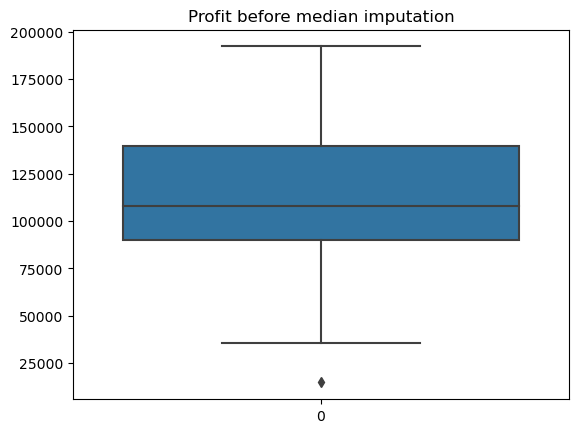

In [18]:
startup_data1 = startup_data.copy()
sns.boxplot(startup_data1['profit'])
plt.title('Profit before median imputation')
plt.show()

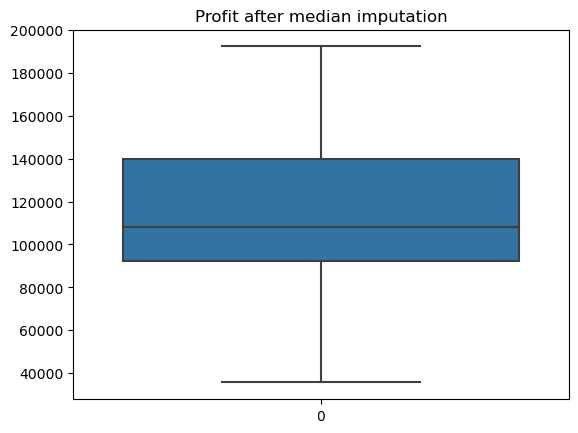

In [19]:
for i in startup_data1['profit']:
    q1 = np.quantile(startup_data1.profit,0.25)
    q3 = np.quantile(startup_data1.profit,0.75)
    med = np.median(startup_data1.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        startup_data1['profit'] = startup_data1['profit'].replace(i, np.median(startup_data1['profit']))
sns.boxplot(startup_data1['profit'])
plt.title('Profit after median imputation')
plt.show()

In [20]:
median_imputation_model = smf.ols("profit ~ research + admin + marketing", data = startup_data1).fit()
# Finding rsquared values
print('R-squared     :',median_imputation_model.rsquared.round(3))
print('Adj.R-squared :',median_imputation_model.rsquared_adj.round(3))

R-squared     : 0.918
Adj.R-squared : 0.913


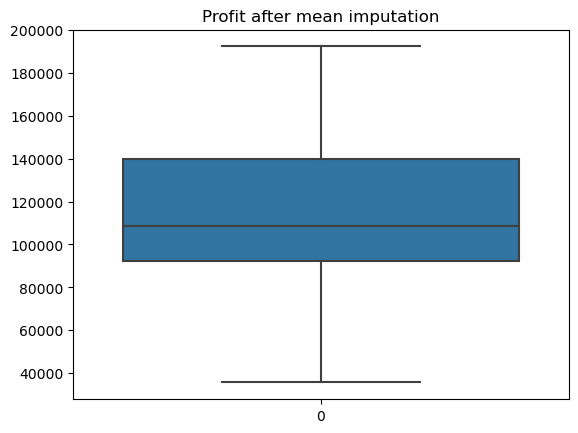

In [21]:
startup_data2 = startup_data.copy()
for i in startup_data2['profit']:
    q1 = np.quantile(startup_data2.profit,0.25)
    q3 = np.quantile(startup_data2.profit,0.75)
    med = np.median(startup_data2.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        startup_data2['profit'] = startup_data2['profit'].replace(i, np.mean(startup_data2['profit']))
sns.boxplot(startup_data2['profit'])
plt.title('Profit after mean imputation')
plt.show()

In [22]:
mean_imputation_model = smf.ols("profit ~ research + admin + marketing", data = startup_data2).fit()
# Finding rsquared values
print('R-squared     :',mean_imputation_model.rsquared.round(3))
print('Adj.R-squared :',mean_imputation_model.rsquared_adj.round(3))

R-squared     : 0.912
Adj.R-squared : 0.906


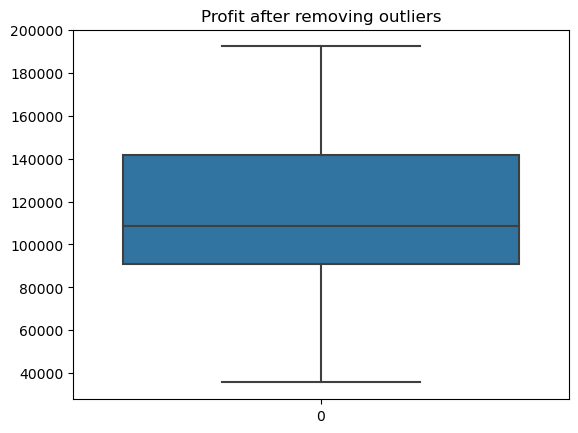

In [23]:
startup_data3 = startup_data.copy()
def drop_outliers(startup_data3, field_name):
    iqr = 1.5*(np.percentile(startup_data3[field_name], 75) - np.percentile(startup_data3[field_name], 25))
    startup_data3.drop(startup_data3[startup_data3[field_name] > (iqr + np.percentile(startup_data3[field_name], 75))].index, inplace=True)
    startup_data3.drop(startup_data3[startup_data3[field_name] < (np.percentile(startup_data3[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(startup_data3, 'profit')
sns.boxplot(startup_data3.profit)
plt.title('Profit after removing outliers')
plt.show()

In [24]:
removed_outlier_model = smf.ols("profit ~ research + admin + marketing", data = startup_data3).fit()
# Finding rsquared values
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.961
Adj.R-squared : 0.959


In [25]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

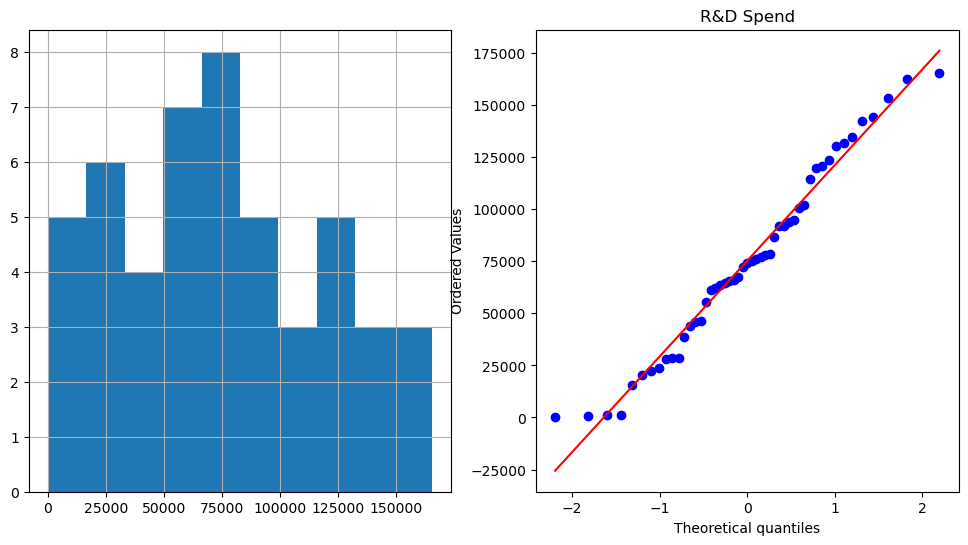

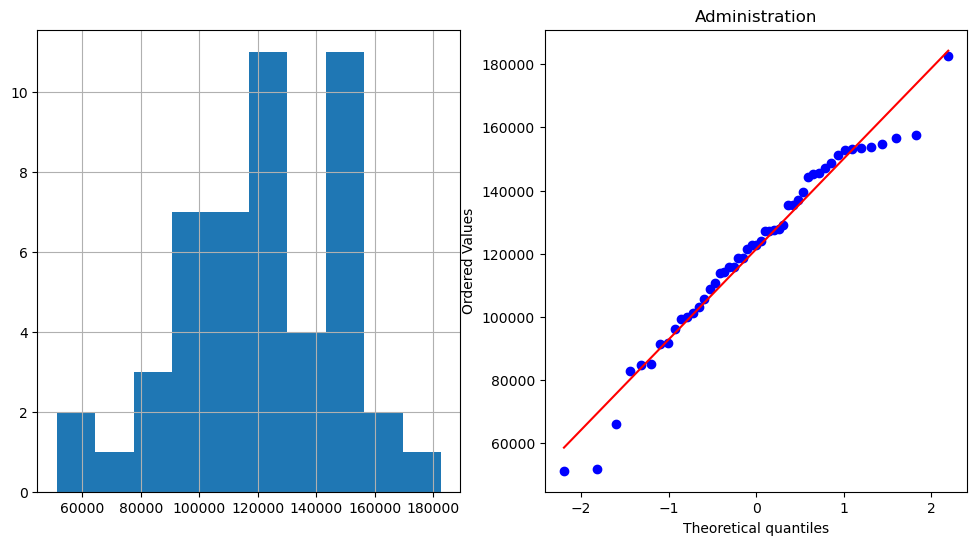

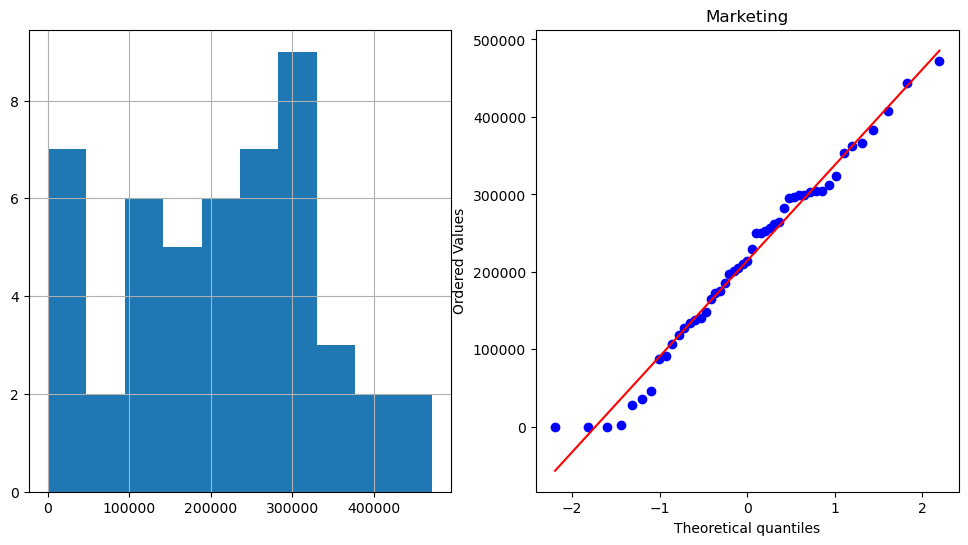

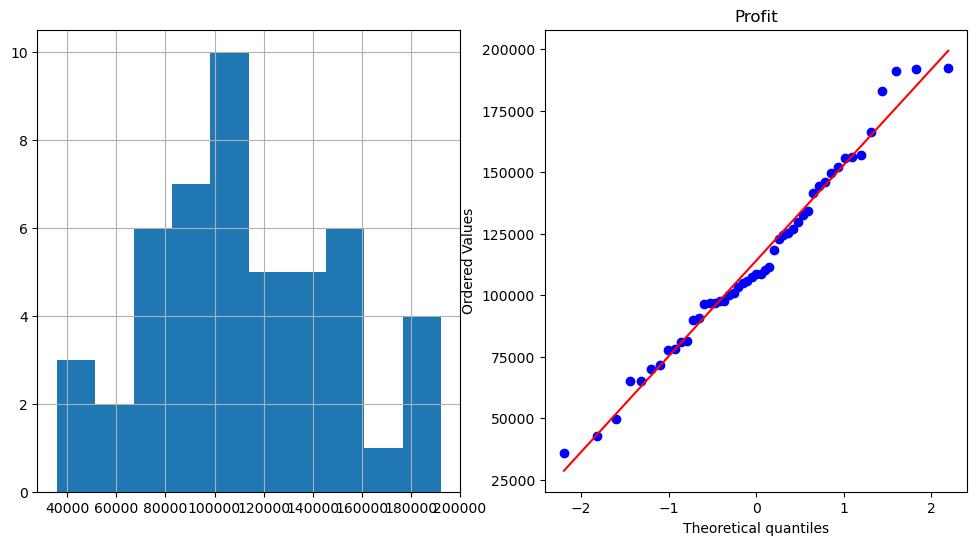

In [26]:
plot_data(startup_data3,'research')
plt.title('R&D Spend')
plot_data(startup_data3,'admin')
plt.title('Administration')
plot_data(startup_data3,'marketing')
plt.title('Marketing')
plot_data(startup_data3,'profit')
plt.title('Profit')
plt.show()

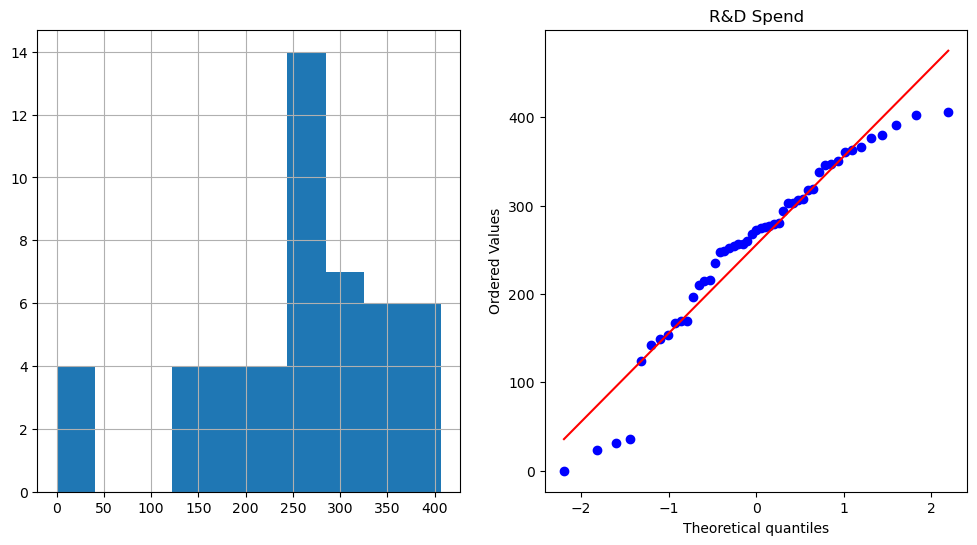

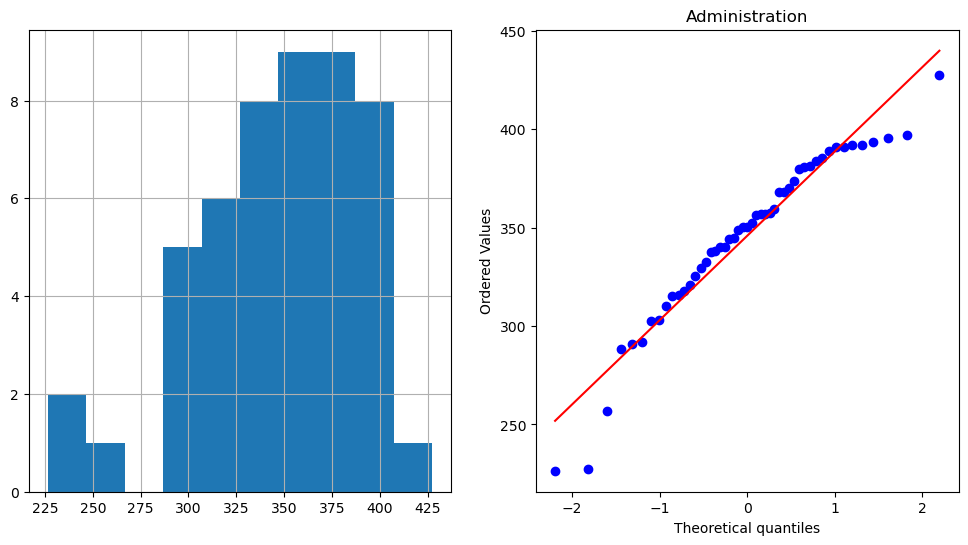

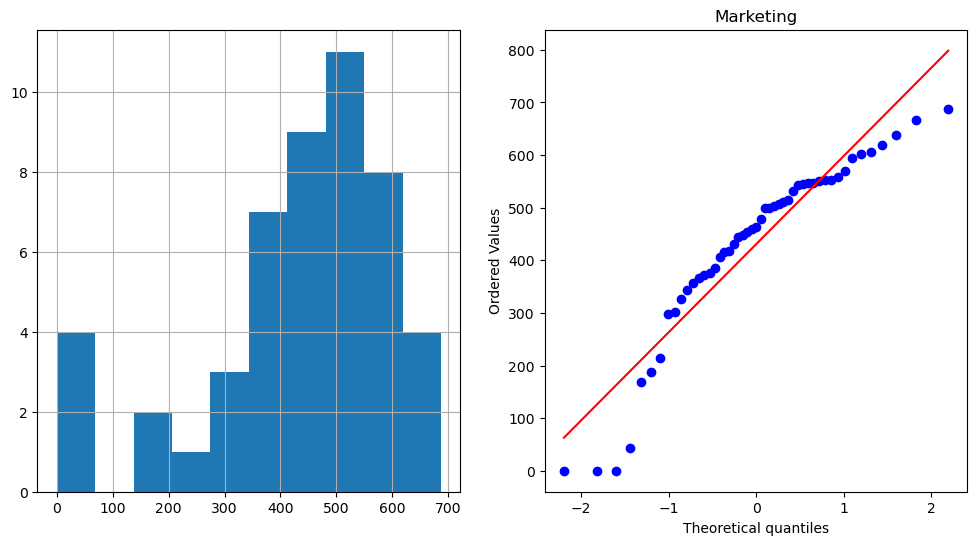

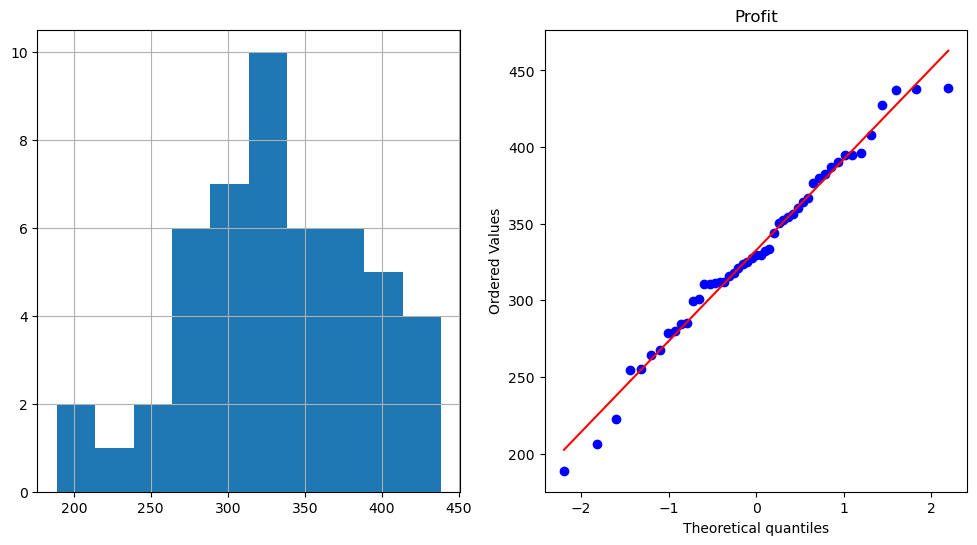

In [27]:
data_sqrt = startup_data3.copy()
data_sqrt[continuous_feature]=np.sqrt(data_sqrt[continuous_feature])

plot_data(data_sqrt,'research')
plt.title('R&D Spend')
plot_data(data_sqrt,'admin')
plt.title('Administration')
plot_data(data_sqrt,'marketing')
plt.title('Marketing')
plot_data(data_sqrt,'profit')
plt.title('Profit')
plt.show()

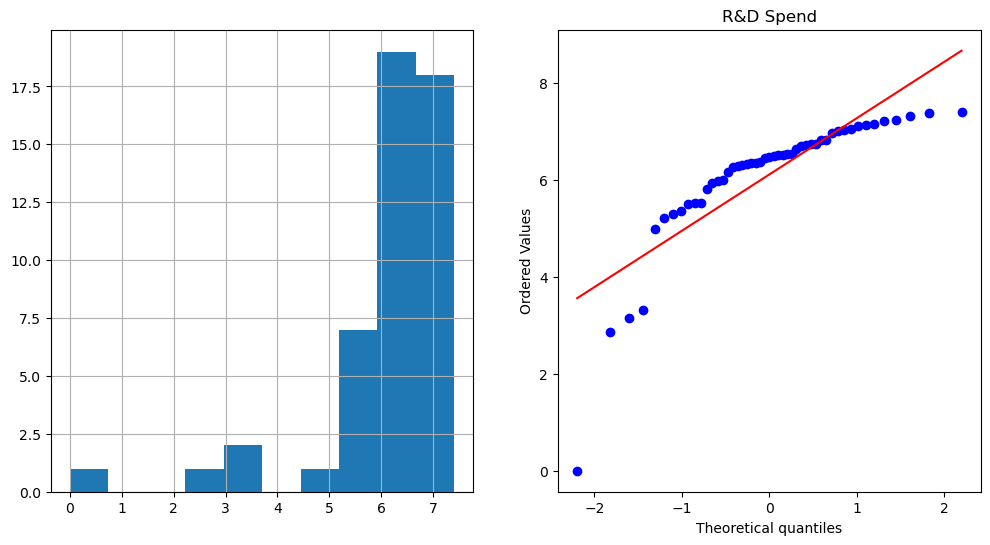

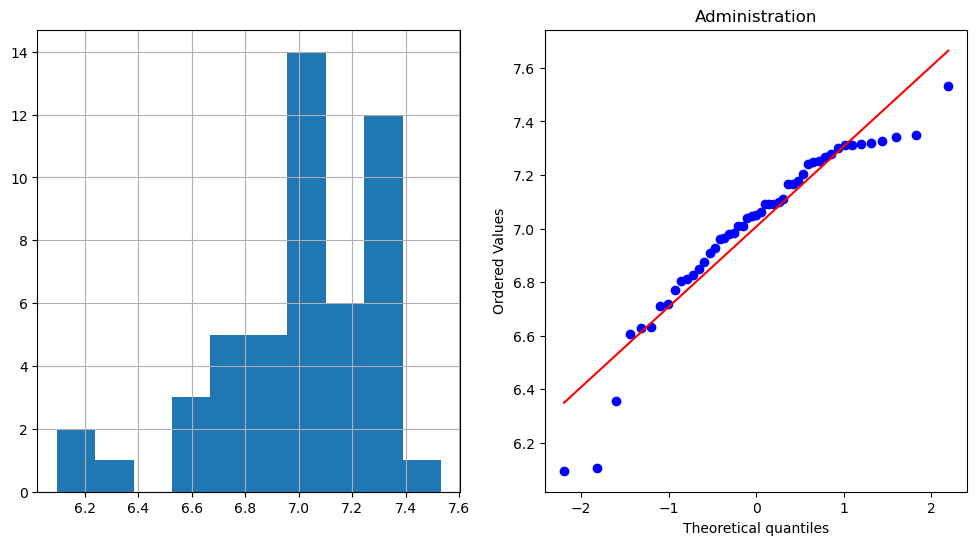

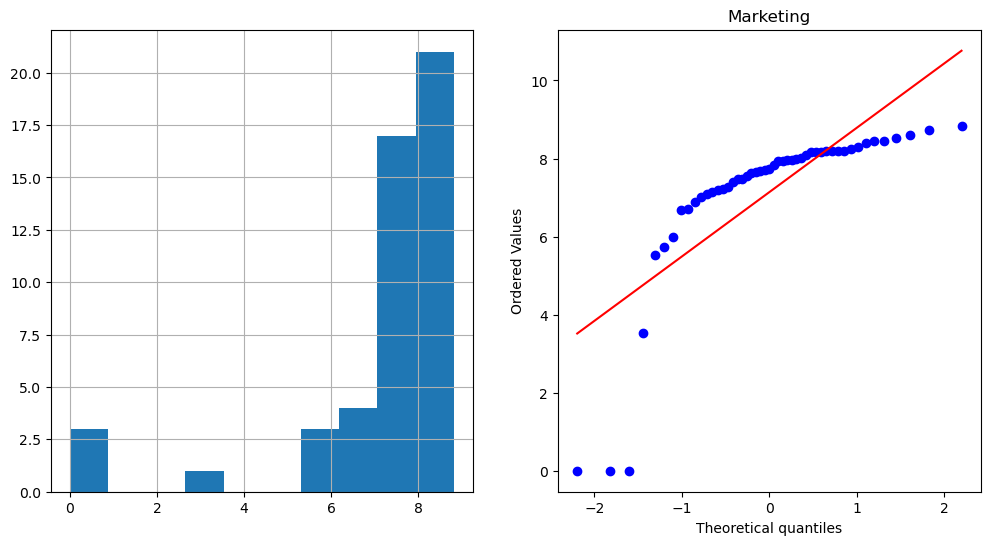

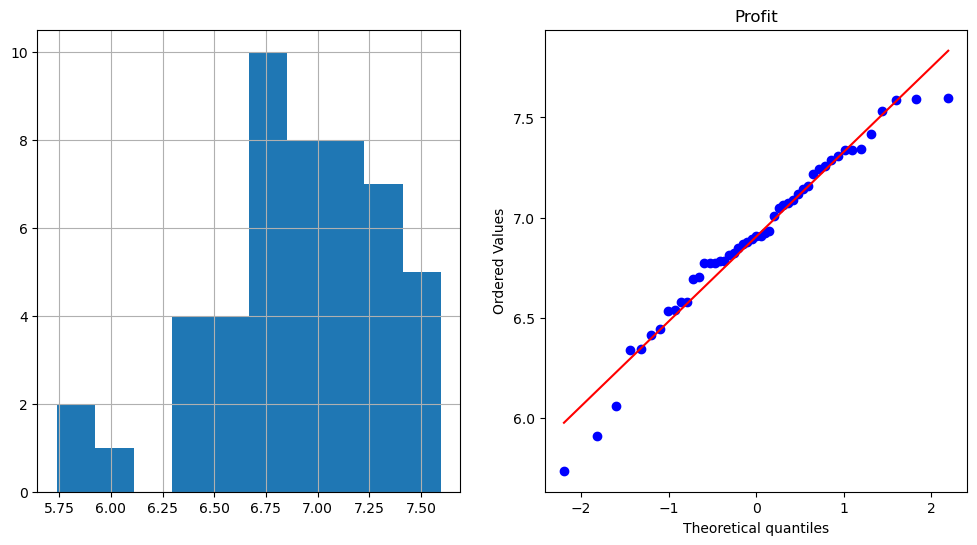

In [28]:
data_cbrt = startup_data3.copy()
data_cbrt[continuous_feature]=np.cbrt(data_sqrt[continuous_feature])

plot_data(data_cbrt,'research')
plt.title('R&D Spend')
plot_data(data_cbrt,'admin')
plt.title('Administration')
plot_data(data_cbrt,'marketing')
plt.title('Marketing')
plot_data(data_cbrt,'profit')
plt.title('Profit')
plt.show()

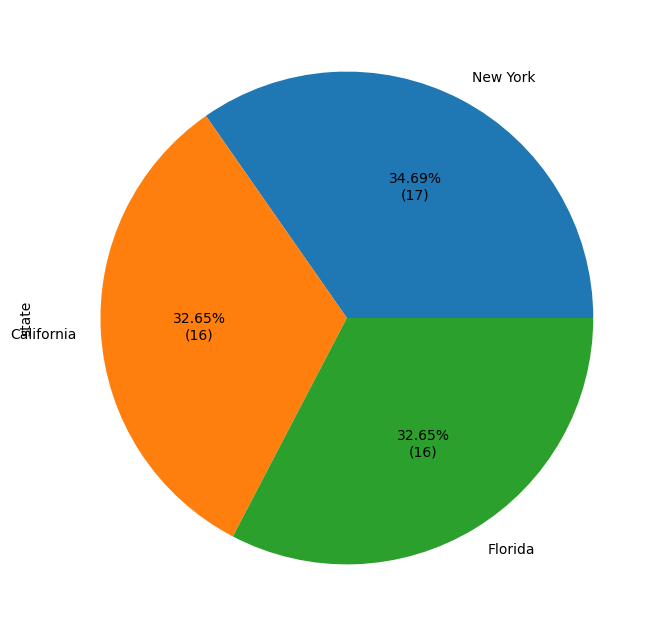

In [29]:
plt.figure(figsize=(8,8))
startup_data3['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(startup_data3['state'].value_counts().sum())))
plt.show()

In [30]:
startup_data3.columns

Index(['research', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [31]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature      :',shapiro(startup_data3.research),'\n'
      'Administration feature :',shapiro(startup_data3.admin),'\n'
      'Marketing Spend feature:',shapiro(startup_data3.marketing),'\n'
      'Profit feature         :',shapiro(startup_data3.profit))

R&D Spend feature      : ShapiroResult(statistic=0.9705320596694946, pvalue=0.25422945618629456) 
Administration feature : ShapiroResult(statistic=0.9695430994033813, pvalue=0.23222042620182037) 
Marketing Spend feature: ShapiroResult(statistic=0.9757171273231506, pvalue=0.4016808867454529) 
Profit feature         : ShapiroResult(statistic=0.9793393015861511, pvalue=0.5378792881965637)


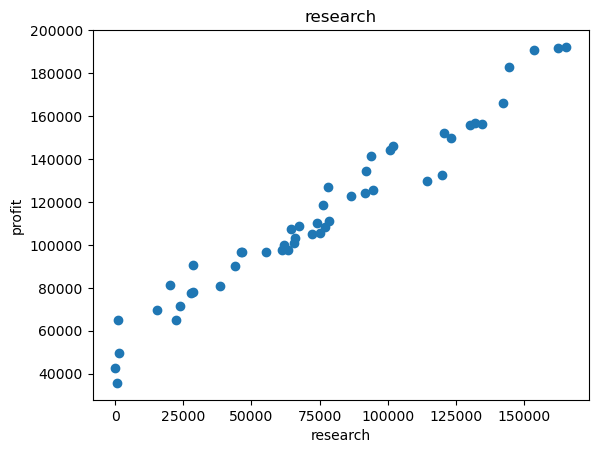

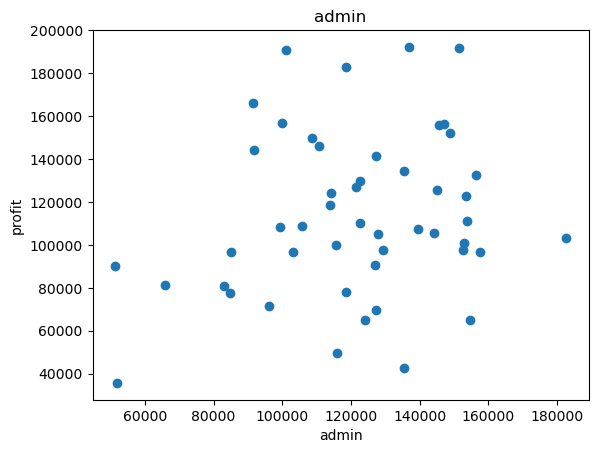

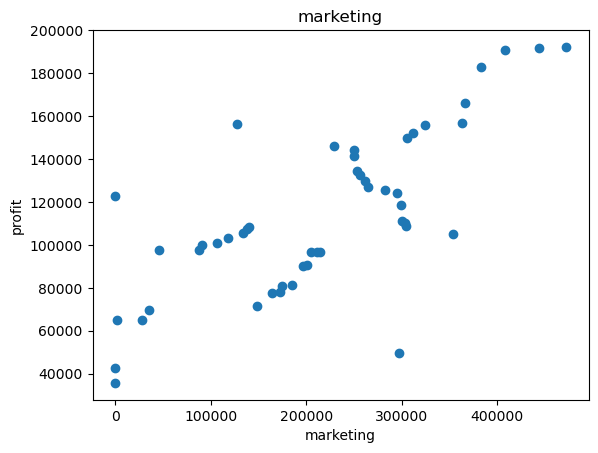

In [32]:
for feature in continuous_feature:
    if feature!="profit":
        data = startup_data3.copy()         
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

In [33]:
bp = sns.barplot(x = "state", y = 'profit', data = startup_data3)
for i in bp.containers:
    bp.bar_label(i,)

In [34]:
startup_data4 = startup_data3.drop('state',axis=1)
startup_data4.head()

,research,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [35]:
startup_data4.corr()

,research,admin,marketing,profit
research,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


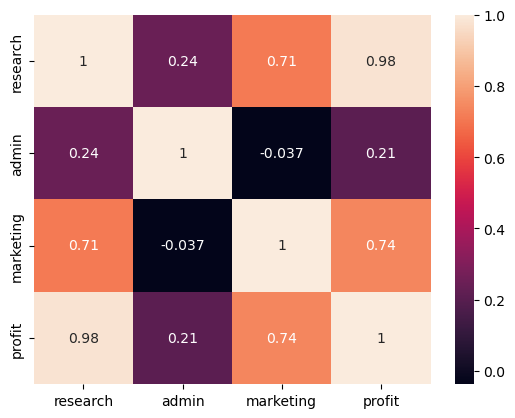

In [36]:
sns.heatmap(startup_data4.corr(),annot=True)
plt.show()

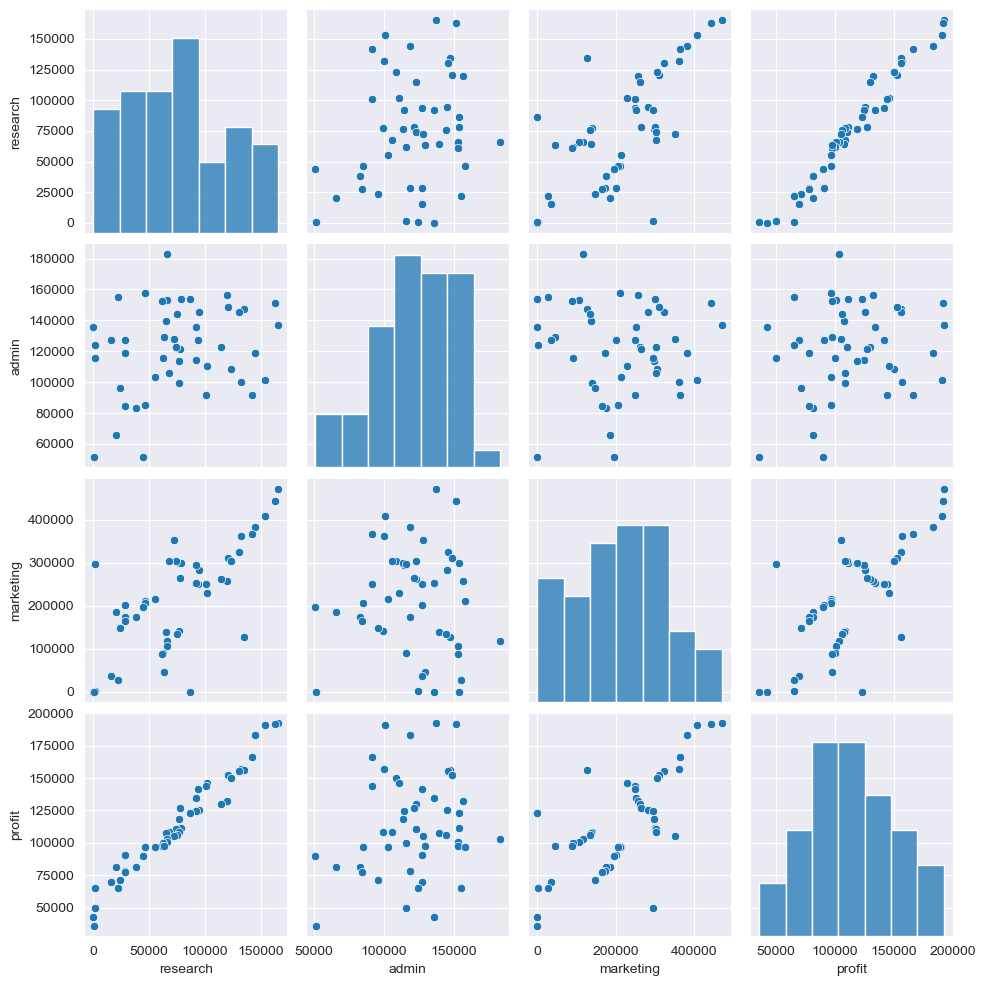

In [37]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_data4)
plt.show()

In [38]:
data_standard_scaled = startup_data4.copy()
features = data_standard_scaled[continuous_feature]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
data_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
data_standard_scaled.head()

,research,admin,marketing,profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


In [41]:
print('Mean' '\n',np.round(data_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(data_standard_scaled.std()),1)


Mean
 research     0.0
admin       -0.0
marketing   -0.0
profit      -0.0
dtype: float64 
Standard Devaition 
 research     1.0
admin        1.0
marketing    1.0
profit       1.0
dtype: float64 1


In [42]:
model = smf.ols("profit ~ research + admin + marketing", data = data_standard_scaled).fit()
# Finding rsquared values
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.961
Adj.R-squared : 0.959


In [43]:
model.params

Intercept   -1.838807e-16
research     9.254411e-01
admin       -1.646059e-02
marketing    8.009988e-02
dtype: float64

In [44]:
display(np.round(model.tvalues,3), np.round(model.pvalues,3))

Intercept    -0.000
research     20.470
admin        -0.518
marketing     1.825
dtype: float64

Intercept    1.000
research     0.000
admin        0.607
marketing    0.075
dtype: float64

In [45]:
admin_slr_model = smf.ols("profit ~ admin", data = data_standard_scaled).fit()

In [46]:
print('R-squared     :',admin_slr_model.rsquared.round(3))
print('Adj.R-squared :',admin_slr_model.rsquared_adj.round(3))

R-squared     : 0.042
Adj.R-squared : 0.022


In [47]:
display(np.round(admin_slr_model.tvalues,3), np.round(admin_slr_model.pvalues,3))

Intercept   -0.000
admin        1.442
dtype: float64

Intercept    1.000
admin        0.156
dtype: float64

In [48]:
marketing_slr_model = smf.ols("profit ~ marketing", data = data_standard_scaled).fit()

In [49]:
print('R-squared     :',marketing_slr_model.rsquared.round(3))
print('Adj.R-squared :',marketing_slr_model.rsquared_adj.round(3))

R-squared     : 0.547
Adj.R-squared : 0.537


In [50]:
display(np.round(marketing_slr_model.tvalues,3), np.round(marketing_slr_model.pvalues,3))

Intercept   -0.000
marketing    7.527
dtype: float64

Intercept    1.0
marketing    0.0
dtype: float64

In [51]:
admin_plus_marketing = smf.ols('profit ~ admin + marketing', data =data_standard_scaled).fit()

In [52]:
print('R-squared     :',admin_plus_marketing.rsquared.round(3))
print('Adj.R-squared :',admin_plus_marketing.rsquared_adj.round(3))

R-squared     : 0.601
Adj.R-squared : 0.584


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = startup_data4[['marketing','admin','research']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.218831
0,marketing,7.589312
2,research,8.602235


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = startup_data4[['marketing','research']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,marketing,7.186744
1,research,7.186744


In [55]:
startup_data4.head(1)

,research,admin,marketing,profit
0,165349.2,136897.8,471784.1,192261.83


In [56]:
admin_present_model = smf.ols('profit ~ research + admin', data= data_standard_scaled).fit()
print('R-squared     :',admin_present_model.rsquared.round(3))
print('Adj.R-squared :',admin_present_model.rsquared_adj.round(3))
print('AIC Value     :',admin_present_model.aic.round(3))
print('BIC Value     :',admin_present_model.bic.round(3))
print('P-Value       :\n',admin_present_model.pvalues)

R-squared     : 0.958
Adj.R-squared : 0.957
AIC Value     : -10.808
BIC Value     : -5.133
P-Value       :
 Intercept    1.000000e+00
research     5.451979e-33
admin        2.728844e-01
dtype: float64


eval_env: 1


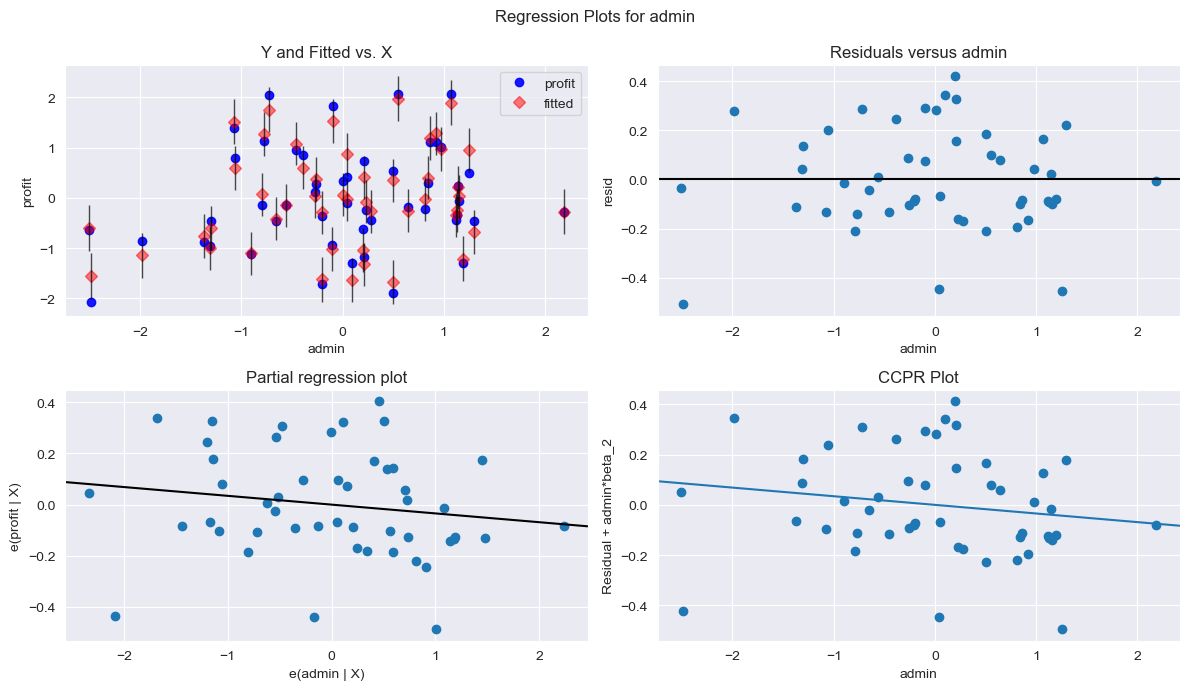

In [57]:
fig = plt.figure(figsize = (12,7))
sm.graphics.plot_regress_exog(admin_present_model, 'admin', fig=fig)
plt.show()

In [58]:
marketing_present_model = smf.ols('profit ~ research + marketing', data= data_standard_scaled).fit()
print('R-squared     :',marketing_present_model.rsquared.round(3))
print('Adj.R-squared :',marketing_present_model.rsquared_adj.round(3))
print('AIC Value     :',marketing_present_model.aic.round(3))
print('BIC Value     :',marketing_present_model.bic.round(3))
print('P-Value       :\n',marketing_present_model.pvalues)

R-squared     : 0.961
Adj.R-squared : 0.959
AIC Value     : -14.017
BIC Value     : -8.342
P-Value       :
 Intercept    1.000000e+00
research     3.628510e-26
marketing    4.084443e-02
dtype: float64


eval_env: 1


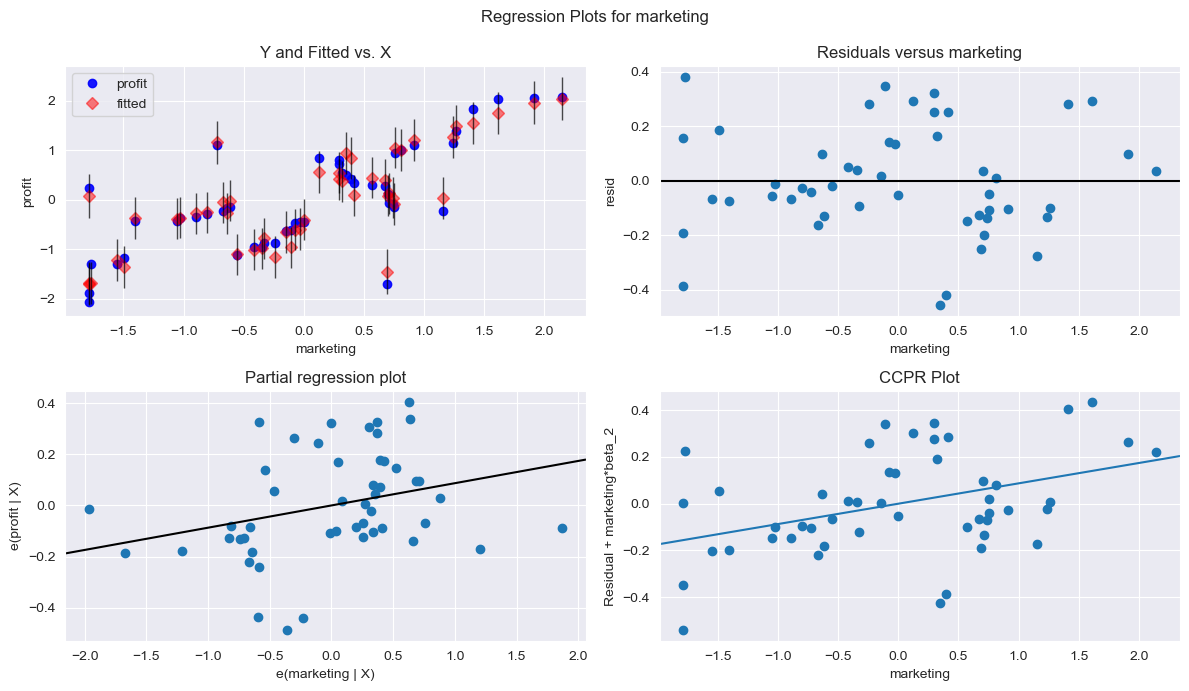

In [59]:
fig = plt.figure(figsize = (12,7))
sm.graphics.plot_regress_exog(marketing_present_model, 'marketing', fig=fig)
plt.show()

In [60]:
research_model = smf.ols('profit ~ research', data= data_standard_scaled).fit()
print('R-squared     :',research_model.rsquared.round(3))
print('Adj.R-squared :',research_model.rsquared_adj.round(3))
print('AIC Value     :',research_model.aic.round(3))
print('BIC Value     :',research_model.bic.round(3))
print('P-Value       :\n',research_model.pvalues)

R-squared     : 0.957
Adj.R-squared : 0.956
AIC Value     : -11.514
BIC Value     : -7.73
P-Value       :
 Intercept    1.000000e+00
research     7.555104e-34
dtype: float64


eval_env: 1


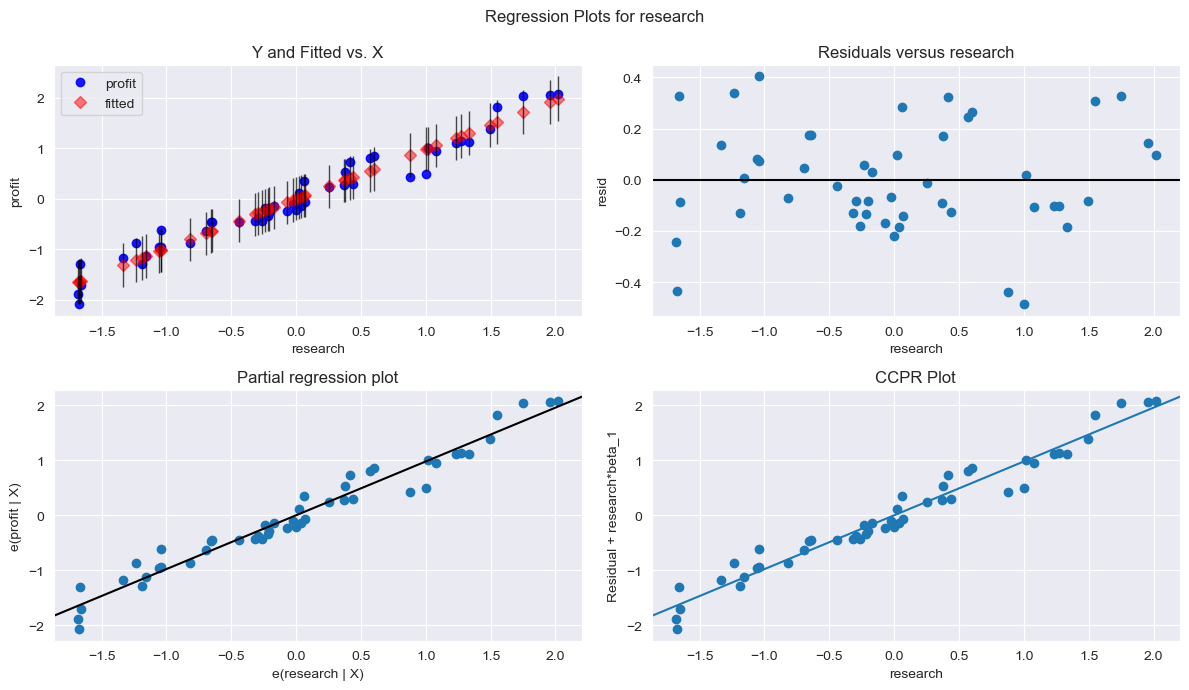

In [61]:
fig = plt.figure(figsize = (12,7))
sm.graphics.plot_regress_exog(research_model, 'research', fig=fig)
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [63]:
startup_data.columns

Index(['research', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [64]:
x = startup_data4.drop('profit', axis = 1).values
y = startup_data4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x : ",x.shape)
print("Shape of y : ",y.shape)

Shape of x :  (49, 3)
Shape of y :  (49, 1)


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 13)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (39, 3)
Shape of X_test  :  (10, 3)
Shape of y_train :  (39, 1)
Shape of y_test  :  (10, 1)


In [66]:
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

In [67]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [68]:
lin_reg_model = LinearRegression().fit(x_train, y_train)
print(lin_reg_model.score(x_train, y_train),lin_reg_model.score(x_test, y_test))

0.9613369174842474 0.957111890910459


In [69]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [70]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                      :", cv_linear.mean())
print("R2_score (train)        :", r2_score_all_feature_train)
print("R2_score (test)         :" , r2_score_all_feature_test)
print("RMSE using all features :", rmse_linear_using_all_features)

CV                      : 0.7452761878241341
R2_score (train)        : 0.9613369174842474
R2_score (test)         : 0.9571118909104595
RMSE using all features : 8680.586928307164


In [71]:
x = startup_data4.drop(['profit','admin'],axis=1).values
y = startup_data4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x : ",x.shape)
print("Shape of y : ",y.shape)

Shape of x :  (49, 2)
Shape of y :  (49, 1)


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 13)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (39, 2)
Shape of X_test  :  (10, 2)
Shape of y_train :  (39, 1)
Shape of y_test  :  (10, 1)


In [73]:
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

In [74]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [75]:
lin_reg_model2 = LinearRegression().fit(x_train, y_train)
print(lin_reg_model2.score(x_train, y_train),lin_reg_model2.score(x_test, y_test))

0.9609452497046181 0.9579398625556338


In [76]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [77]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                                   : ", cv_linear.mean())
print("R2_score (train)                     : ", r2_score_rnd_and_marketing_train)
print("R2_score (test)                      : ", r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature : ", rmse_linear_using_RnD_and_marketing)

CV                                   :  0.7392936435006405
R2_score (train)                     :  0.9609452497046181
R2_score (test)                      :  0.9579398625556339
RMSE using RnD and Marketing feature :  8596.387516937453


In [78]:
x = startup_data4.iloc[:,:1].values
y = startup_data4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x : ",x.shape)
print("Shape of y : ",y.shape)

Shape of x :  (49, 1)
Shape of y :  (49, 1)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36, 1)
Shape of X_test  :  (13, 1)
Shape of y_train :  (36, 1)
Shape of y_test  :  (13, 1)


In [80]:
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

In [81]:
regressor_linear_using_rnd = LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal, y_train_scal)

LinearRegression()

In [82]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [83]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear_using_rnd, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE on Test set results
rmse_linear_using_only_RnD = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                          : ", cv_linear.mean())
print("R2_score (train)            : ", r2_score_rnd_train)
print("R2_score (test)             : ", r2_score_rnd_test)
print("RMSE using only RnD feature : ", rmse_linear_using_only_RnD)

CV                          :  0.8900789292733178
R2_score (train)            :  0.957733077239081
R2_score (test)             :  0.9521017609333128
RMSE using only RnD feature :  7152.417057875892


In [84]:
rmse_compare = {'Using All Features Model': rmse_linear_using_all_features,'Using RnD and Marketing Feature Model': rmse_linear_using_RnD_and_marketing, 'Using only R&D Feauture Model': rmse_linear_using_only_RnD}
min(rmse_compare, key=rmse_compare.get)

'Using only R&D Feauture Model'

In [85]:
final_model = smf.ols('profit ~ research', data= data_standard_scaled).fit()
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))
print('P-Value       :\n',final_model.pvalues)

R-squared     : 0.957
Adj.R-squared : 0.956
AIC Value     : -11.514
BIC Value     : -7.73
P-Value       :
 Intercept    1.000000e+00
research     7.555104e-34
dtype: float64


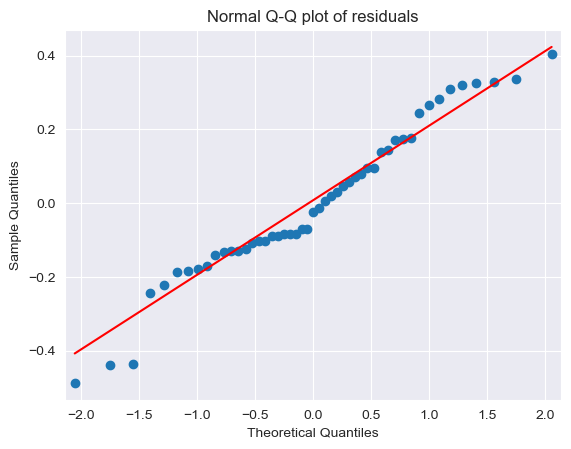

In [86]:
sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [87]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

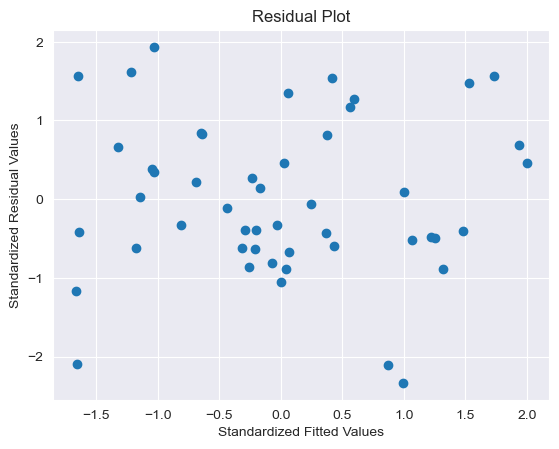

In [88]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


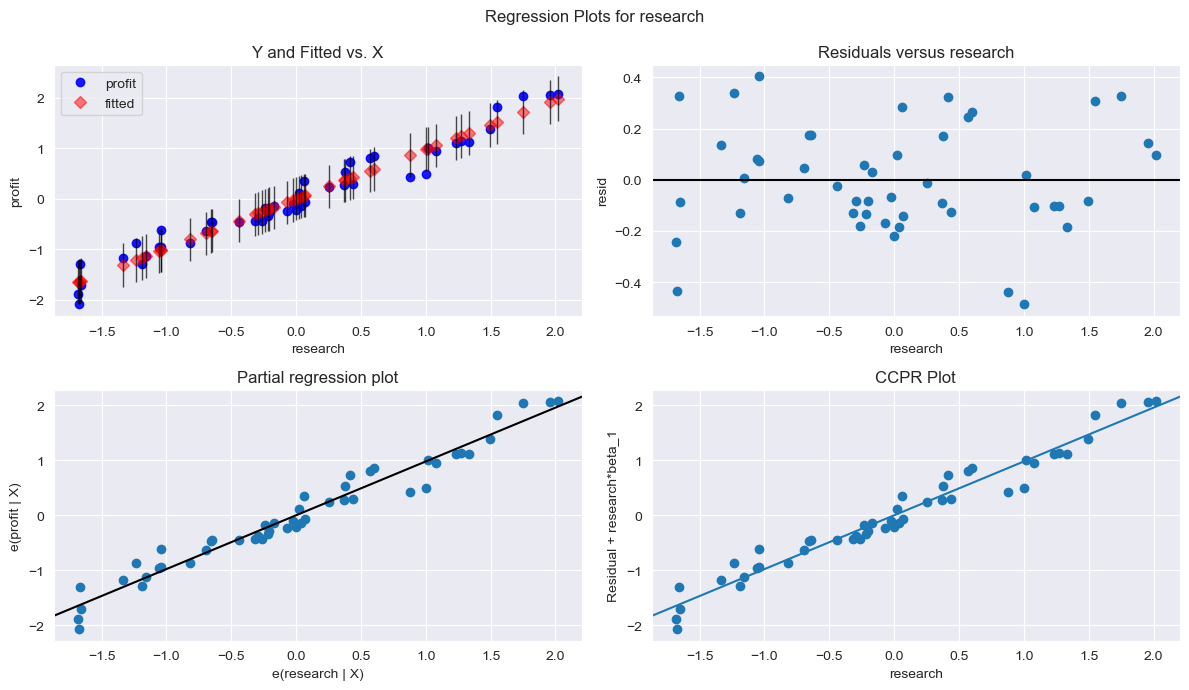

In [89]:
fig = plt.figure(figsize = (12,7))
plot_RnD = sm.graphics.plot_regress_exog(final_model, 'research', fig=fig)
plt.show()

In [90]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance

In [91]:
from statsmodels.graphics.regressionplots import influence_plot

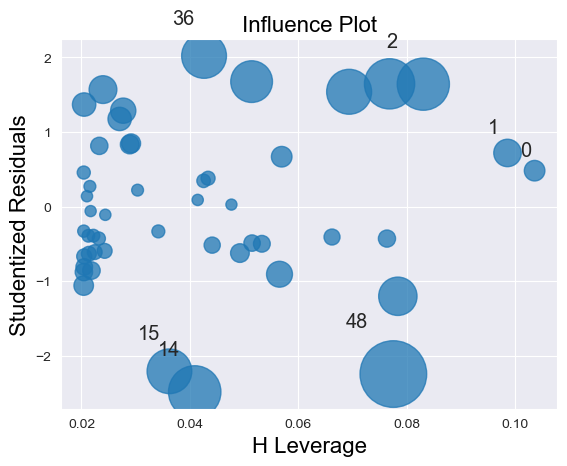

In [92]:
influence_plot(final_model)
plt.show()

In [93]:
k = startup_data4.shape[1]
n = startup_data4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


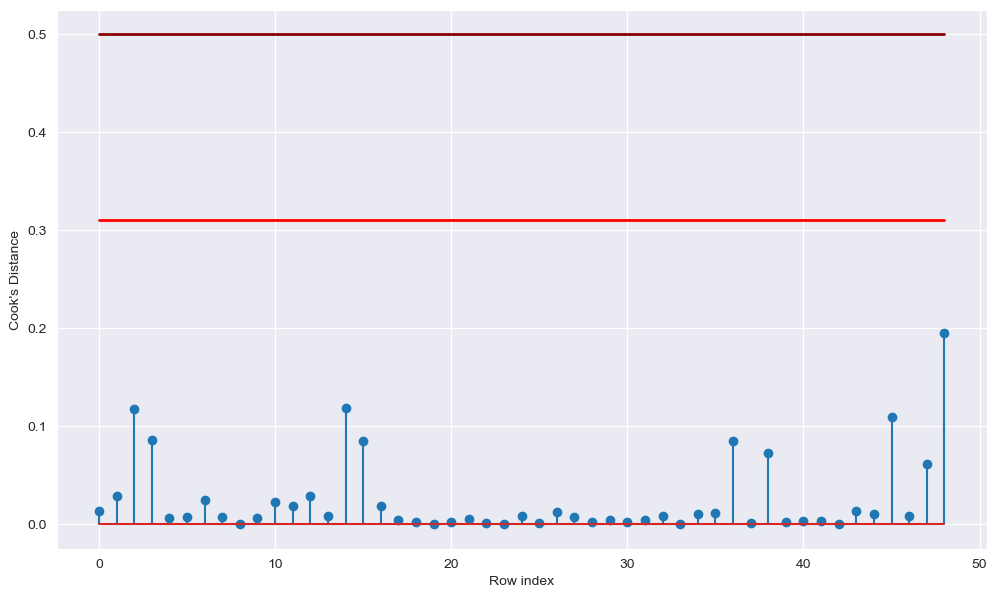

In [94]:
fig = plt.figure(figsize = (12,7))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y, color = 'darkred', linewidth = 2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(startup_data4)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [95]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(startup_data4.research.values.reshape(-1,1))

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [96]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = startup_data4.profit
predicted['RnD'] = startup_data4.research
predicted

,Predicted_Profit,Profit,RnD
0,188741.633166,192261.83,165349.20
1,186461.632949,191792.06,162597.70
2,178874.456794,191050.39,153441.51
3,171359.446810,182901.99,144372.41
4,169482.521463,166187.94,142107.34
5,161005.179859,156991.12,131876.90
6,163274.457488,156122.51,134615.46
7,159696.949460,155752.60,130298.13
8,151613.070514,152211.77,120542.52
9,153926.928921,149759.96,123334.88


In [97]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_Outlier','Removed_Outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[raw_model.rsquared,median_imputation_model.rsquared,mean_imputation_model.rsquared,removed_outlier_model.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[raw_model.rsquared_adj,median_imputation_model.rsquared_adj,mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,model.rsquared_adj,marketing_present_model.rsquared_adj,research_model.rsquared_adj],
        'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(median_imputation_model.mse_resid),np.sqrt(mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table = pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_Outlier,0.911954,0.906212,11570.325358
3,Removed_Outlier,0.961316,0.958737,7753.807752
4,Using All Features Model,0.961337,0.958737,8680.586928
5,Using RnD and Marketing Feature Model,0.960945,0.959394,8596.387517
6,Using only R&D Feauture Model,0.957733,0.956432,7152.417058


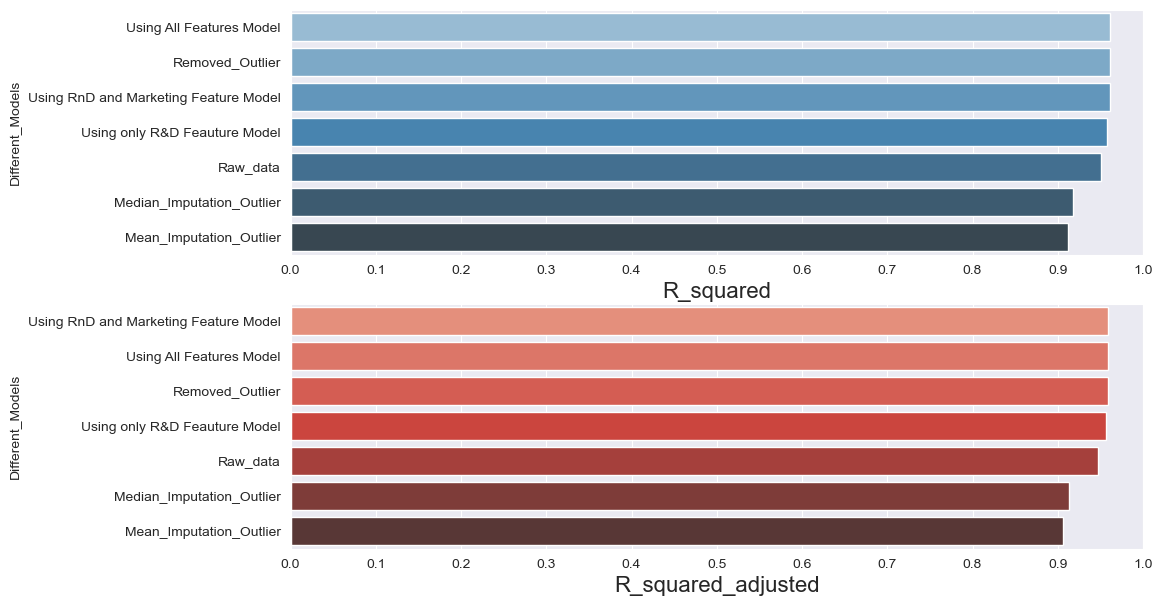

In [98]:
f, axes = plt.subplots(2,1, figsize=(11,7))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)
sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)
sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

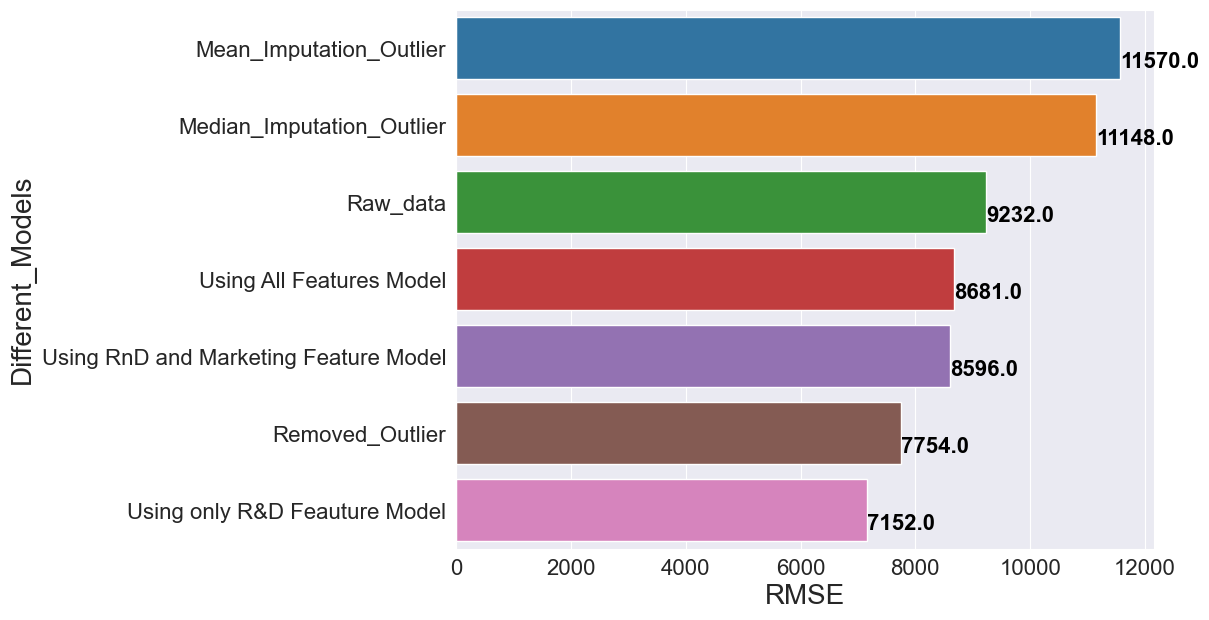

In [99]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(9,7))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('RMSE', size=20)
axe.set_ylabel('Different_Models', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
    color = 'black', fontweight = 'bold', fontsize= 16)
plt.show()